Importing and Installing dependencies

In [43]:
%pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import time
import mediapipe as mp 

Keypoints using mp_holistic and mp_drawing

In [6]:
# used for bringing the holistic model through .holistic
mp_holistic = mp.solutions.holistic # Holistic model
# used for drawing the utilities - points and structure from the midiapipe which is its main function through .drawing_utils
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
# creating a function so that I do not have to write the below cell again and again
# passing two variables image and model . image from the user and the model for mediapipe utilization

def mediapipe_detection(image, model):
    # so opencv reads the image in form of bgr but for detection using mediapipe we require the format to be RGB
    # so cv2.cvtcolor helps in recolouring the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB (openCV uses BGR format and mediapipe uses RGB format)
    image.flags.writeable = False                  # Image is no longer writeable this helps us in saving a bit of memory
    # so here image is going to be a frame from video
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    # so that opencv can produce results in bgr format
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:

def draw_landmarks(image, results):
    # so we are passing it into the .draw_landmarks resulting the producing a structure to the image in the video
    # passing the image and results with respect to the lists of the various types of landmarks like face, left hand or right hand etc
    # this will provide us with the items present in the lists with a comprehensive details for the perticular landmarks section
    # mp_holistic is allowing us to pass the image via the connection map for a perticular landmark 
    # draw_landmark func does not return the image but rather applies the landmark visualizations to the current image in place.
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # comes with the mediapipe a helper function mp_drawing Draws the landmarks and the connections on the image.
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # color the joint 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #color the connection
                             ) 
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
# so we are accesing the mediapipe model: mp_holistic.Holistic 
# so how the mediapipe model works is that it actuallly makes an initial detection using the min_detection_confidence 
# then track the key points with min_tracking_confidence=0.5 we can change it as well
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        # for entering the function
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # # Draw landmarks
        # helps in accessing the draw_landmarks func allowing to draw landmarks through mediapipe 
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [81]:
cap.release()
cv2.destroyAllWindows()

Extracting keypoint values

In [82]:
# results.
# here we have acquired the results parameters from the model like the mediapipe is effectively working
# as for eg:
results.pose_landmarks.landmark[0].visibility
# which helps in confirming the mediapipe model
# further here we are also conforming the "visibility" parameter of the landmark from pose through the test array formed  


0.9998420476913452

In [83]:
len(results.pose_landmarks.landmark)
# getting 33 because mediapipe offers 33 types of landmarks for the pose_landmarks func
# like nose , ears, shoulders wrists,etc

33

In [84]:
# pose=[]
# for res in results.pose_landmarks.landmark:
#     test=np.array([res.x,res.y,res.z,res.visibility])
#     pose.append(test)


# so here we are basically forming an array pose which basically contains the parameters for the landmarks in the res variable obtained from the results from the pose_landmark
# again pose_landmarks denotes the func from the mediapipe lib and "landmark" shows the perticular landmark value out of those 33 parameters
# so we used .flatten to make it compatible for the LSTM model used further
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [85]:
pose.shape
# conforming the shape of the array i.e 1 d

(132,)

In [86]:
# Handle left hand detection
lh = (np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
      if results.left_hand_landmarks else np.zeros(21 * 3))

# Handle right hand detection
rh = (np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 
      if results.right_hand_landmarks else np.zeros(21 * 3))

In [87]:
# similarly for face
face_all_parameters=len(results.face_landmarks.landmark)*3
print(face_all_parameters)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

1404


In [88]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # facial features have no role in sign language detection
    #face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,lh,rh])
# concatenating for the model to detect the sign language


In [89]:
extract_keypoints(results).shape

(258,)

Setting up folders for collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH=os.path.join('./data for different actions')


# so what here we are going to do is that here the data will be collected and for that
# 30 number of sequences are taken into consideration which means that 30 videos worth of data
# for each sequence as well here 30 frames in length are taken into consideration which means 30*30 data
# again here we have for ex 3 gestures so the data becomes 30*30*3
# again here we have 1662 keypoints for the landmarks obtained earlier as a result the final data = 30*30*3*1662
# Actions that we try to detect
actions = np.array(['hello', 'my', 'name','Abhay','Soham', 'Subhadeep', 'Thank you', 'I love you'])

# Ninety videos worth of data
no_of_sequences = 90

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:

# just creating the folders and sub folders
# action and seq in nested loop for forming folders

for action in actions: 
    for sequence in range(no_of_sequences):
        try: 
# makedirs used for making the sub directories
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


'\n# just creating the folders and sub folders\n# action and seq in nested loop for forming folders\n\nfor action in actions: \n    for sequence in range(no_of_sequences):\n        try: \n# makedirs used for making the sub directories\n            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))\n        except:\n            pass\n'

Collecting keypoint values for Training nd Testing

In [ ]:

# Set mediapipe model 
cap = cv2.VideoCapture(0)
# 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions
    # this loop is for specifications of the number of times the frames need to be saved for every sequence w.r.t every action
    for action in actions:
        # Looping through sequences aka videos
        for sequence in range(no_of_sequences):
            # Looping through video length aka sequence length (mentioned above) - can be changed
            for frame_num in range(sequence_length):

                # Reading the frame from the video. This frame will be used for further analysis
                ret, frame = cap.read() 
                # Making the detections using the mediapipe_detection func where the model will be able to process the frame like BGR to RGB 
                image, results = mediapipe_detection(frame, holistic)
                # print(results)
                # Drawing landmarks on the acquired frame
                draw_styled_landmarks(image, results)


                # logic is for the formating portion
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    # providing the break for adjusting the posture
                    cv2.waitKey(2000) #2 sec
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                

                # NEW Export keypoints
                # now for this frame or results obtained from mediapipe_extraction which will be RGB the keypoints will be extracted from the extract_keypoint func in the form of a 1 d array.
                # again in ideal senario the no of extracted points will be 1662 as found
                keypoints = extract_keypoints(results)
                # providing the path for the save
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # saving the array in the location
                np.save(npy_path, keypoints)

                # Break for this frame and continue for next respective iteration
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    # when loop ends the window closes
    cap.release()
    cv2.destroyAllWindows()



'"\n# Set mediapipe model \ncap = cv2.VideoCapture(0)\n# \nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:\n    # NEW LOOP\n    # Loop through actions\n    # this loop is for specifications of the number of times the frames need to be saved for every sequence w.r.t every action\n    for action in actions:\n        # Looping through sequences aka videos\n        for sequence in range(no_of_sequences):\n            # Looping through video length aka sequence length (mentioned above) - can be changed\n            for frame_num in range(sequence_length):\n\n                # Reading the frame from the video. This frame will be used for further analysis\n                ret, frame = cap.read() \n                # Making the detections using the mediapipe_detection func where the model will be able to process the frame like BGR to RGB \n                image, results = mediapipe_detection(frame, holistic)\n                # print(results)\n  

In [210]:
cap.release()
cv2.destroyAllWindows()

Preprocessing data and creating labels w.r.t. actions

In [211]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [212]:
# creating a dict where label is mapped with a num by def starting from 0
# enumerate calling the next label from the actions list , earlier created as the array
label_map = {label:num for num, label in enumerate(actions)}

In [213]:
label_map

{'hello': 0,
 'my': 1,
 'name': 2,
 'Abhay': 3,
 'Soham': 4,
 'Subhadeep': 5,
 'Thank you': 6,
 'I love you': 7}

In [ ]:

# forming two arrays named as mentioned
# just as a graph where seq will contain all the data with respect to all the videos and frames recorded during the training
# and labels for denoting the actions

# now again this is our main task 
sequences, labels = [], []

# 3 actions so 3 iterations
for action in actions:
    # 30 videos with respect to each action
    for sequence in range(no_of_sequences):
        # forming a blank array for storing that x data of all the collection done till now
        window = []
        # for each frame recorded in each of the seq
        for frame_num in range(sequence_length):
            # so res is basically helping in loading the data for each frame through the os lib
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) # frame_num shows the exact name to counter in the loop
            # appending the window array with res
            window.append(res)
        # now the loop for the frames for a perticular seq is over
        # adding the window data in the sequences array as a 2 d array with one parameter as each frame and second one as keypoints -1662
        sequences.append(window)

        # appending the labels array only once with only action i.e the action running the loop
        # values are going to be 1d because action is just a label which is currently between 0 and 7 running action * seq times , here 30 
        # not any data containing 2 d array
        labels.append(label_map[action])

In [215]:
np.array(sequences).shape

(720, 30, 258)

In [216]:
X = np.array(sequences)

In [217]:
X.shape

(720, 30, 258)

In [218]:

# changing the labels from 0,1,2 to categorical data for easier accessebility
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [219]:
# so spliting the data into train and test with 5 percent of testing 
# data contains the seq with frames and keypoints respectively in form of a 3 d array   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_test.shape


(36, 30, 258)

Building and training LSTM neural network

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [221]:
# adding the logs folder
log_dir = os.path.join('Logs')
# tensorboard is a part of tensorflow monitoring the model training using a web app
# will help to track the accuracy during the training
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# neural network

# adding sequential API cuz it will allow in building the model fluidly
model = Sequential()
# adding the three layers of LSTM consisting of 3 positional argument and 1 keyword argument
# positional arg - depends on the position of the value. wrong position wrong output
# keyword arg - depends w.r.t the value assigned with the variable
# returning sequence is necessery because here if not then the next lstm layer will not follow the prev layer
# adding 65 units in first layer and so on . activation is relu
# input shape is 30,258 for each video i.e 30 frames and  258 keypoints
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
# return seq as false cuz next is dense layer so not required
model.add(LSTM(64, return_sequences=False, activation='relu'))

# adding 64 units for dense layer
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# using softmax so that the values are confined in 0 to 1 the value will sum up and provide 1
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\Abhay Bhardwaj\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [223]:
# eg
eg_res = [0.2, 0.1, 0.3,0.2,0.2]
actions[np.argmax(eg_res)]

'name'

In [224]:
# using the adam optimizer
# categorical_crossentropy for multiclasss classification 
# metrics for evaluation
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [225]:
history = model.fit(X_train, y_train, epochs=209, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - categorical_accuracy: 0.2337 - loss: 1.9366 - val_categorical_accuracy: 0.6423 - val_loss: 1.6389
Epoch 2/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.5129 - loss: 1.5926 - val_categorical_accuracy: 0.6204 - val_loss: 1.1131
Epoch 3/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.7045 - loss: 0.9676 - val_categorical_accuracy: 0.5912 - val_loss: 1.0326
Epoch 4/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.6926 - loss: 1.5019 - val_categorical_accuracy: 0.4964 - val_loss: 6.4755
Epoch 5/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - categorical_accuracy: 0.5011 - loss: 2.8185 - val_categorical_accuracy: 0.6788 - val_loss: 1.1095
Epoch 6/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.5842 - loss: 1.1731 - val_categorical_accuracy: 0.6715 - val_loss: 1.3366
Epoch 7/209
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.6989 - los

In [226]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 30, 64)         │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,250 (2.72 MB)

 Trainable params: 237,416 (927.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,834 (1.81 MB)

8. Making the predictions

In [227]:
res=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step


In [228]:
# again the actions with the max value provided by softmax is returned
actions[np.argmax(res[0])]

'Soham'

In [229]:
actions[np.argmax(y_test[4])]

'hello'

Saving weights for future accessability

In [230]:
model.save('./action.h5')

In [231]:
model.load_weights('./action.h5')

Evaluation using Confusion Matrix and Accuracy score

In [232]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [233]:
yhat = model.predict(X_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [234]:
# so here we are check the results w.r.t the axis - 1 i.e the row no 1 having the values of actions i.e 3 values
# then converting them in list format and finding the max value
ytrue = np.argmax(y_train, axis=1).tolist()
# one hot encoding
yhat = np.argmax(yhat, axis=1).tolist()

In [235]:
yhat

[5,
 4,
 2,
 3,
 3,
 1,
 6,
 1,
 5,
 0,
 1,
 6,
 1,
 2,
 5,
 2,
 5,
 5,
 4,
 1,
 6,
 2,
 2,
 4,
 3,
 0,
 3,
 5,
 0,
 2,
 0,
 1,
 2,
 3,
 2,
 4,
 0,
 7,
 3,
 6,
 2,
 2,
 1,
 2,
 2,
 5,
 6,
 7,
 0,
 4,
 6,
 1,
 1,
 6,
 5,
 1,
 6,
 4,
 5,
 7,
 3,
 0,
 7,
 6,
 6,
 7,
 7,
 1,
 6,
 0,
 2,
 0,
 4,
 3,
 4,
 6,
 0,
 2,
 2,
 2,
 1,
 0,
 7,
 3,
 7,
 2,
 7,
 4,
 4,
 3,
 4,
 2,
 6,
 3,
 0,
 0,
 5,
 2,
 6,
 2,
 6,
 3,
 3,
 1,
 3,
 5,
 1,
 0,
 6,
 7,
 3,
 7,
 0,
 5,
 0,
 2,
 6,
 2,
 5,
 6,
 5,
 5,
 7,
 6,
 6,
 4,
 1,
 7,
 5,
 6,
 1,
 7,
 0,
 6,
 0,
 3,
 7,
 5,
 7,
 7,
 4,
 0,
 4,
 1,
 3,
 6,
 6,
 6,
 1,
 0,
 0,
 3,
 0,
 7,
 7,
 4,
 4,
 6,
 5,
 2,
 1,
 6,
 3,
 5,
 1,
 5,
 7,
 4,
 1,
 3,
 3,
 1,
 6,
 4,
 4,
 2,
 3,
 0,
 4,
 3,
 0,
 5,
 3,
 4,
 7,
 7,
 6,
 5,
 2,
 3,
 4,
 0,
 3,
 5,
 5,
 0,
 0,
 5,
 1,
 1,
 5,
 4,
 4,
 7,
 2,
 7,
 6,
 3,
 2,
 0,
 2,
 0,
 3,
 6,
 6,
 6,
 6,
 3,
 3,
 0,
 7,
 3,
 4,
 6,
 1,
 6,
 4,
 2,
 7,
 7,
 5,
 1,
 6,
 4,
 6,
 5,
 2,
 5,
 5,
 1,
 7,
 4,
 1,
 7,
 2,
 1,
 6,
 3,
 1,
 1,


In [236]:
# confution matrix
multilabel_confusion_matrix(ytrue, yhat)

array([[[596,   1],
        [  1,  86]],

       [[597,   0],
        [  1,  86]],

       [[599,   0],
        [  0,  85]],

       [[597,   2],
        [  0,  85]],

       [[600,   0],
        [  0,  84]],

       [[597,   0],
        [  0,  87]],

       [[596,   1],
        [  1,  86]],

       [[600,   2],
        [  3,  79]]], dtype=int64)

In [237]:
accuracy_score(ytrue, yhat)

0.9912280701754386

FINAL Testing in real time

In [238]:
# for coloring the actions
colors = [(245,117,16), (117,245,16), (16,117,245)]

# results from the model prediction, actions, image from the video, colors from above
def prob_viz(res, actions, input_frame, colors):
    
    output_frame = input_frame.copy()
    # so here prob can be obtained from the softmax from earlier - have 3 values
    for num, prob in enumerate(res):
        # .rectangle for formation of rectangle
        # here the 2nd parameter denotes the position of the color where num can be 0, 1, 2 based on the action and changes the y axis accordingly
        # int prob for x input will help in setting the bar length based on the accuracy of the model prediction and y axis same as above and
        # colors will call the colors function based on the num (of action)
        # -1 for filling up the box
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf


# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.74

cap = cv2.VideoCapture(0)

# Load your trained model
model = tf.keras.models.load_model("./action.h5")  # Ensure model is loaded

# Set up Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()

        # Perform detections
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames

        # Predict when we have 30 frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]  # Model prediction
            predicted_action = actions[np.argmax(res)]

            # Debugging prints
            print("Raw Predictions:", res)
            print("Predicted Index:", np.argmax(res))
            print("Predicted Action:", predicted_action)

            # Ensure stable prediction before displaying
            predictions.append(np.argmax(res))
            predictions = predictions[-10:]  # Keep only last 10 predictions

            if len(predictions) > 0 and np.bincount(predictions).argmax() == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) == 0 or (predicted_action != sentence[-1]):
                        sentence = [predicted_action]  # Show only the latest correct label
                        print("Updated Sentence:", sentence)

        # Display the predicted label
        cv2.putText(image, sentence[0] if sentence else "Waiting...", (3, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show video feed
        cv2.imshow('OpenCV Feed', image)

        # Exit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [240]:
cap.release()
cv2.destroyAllWindows()

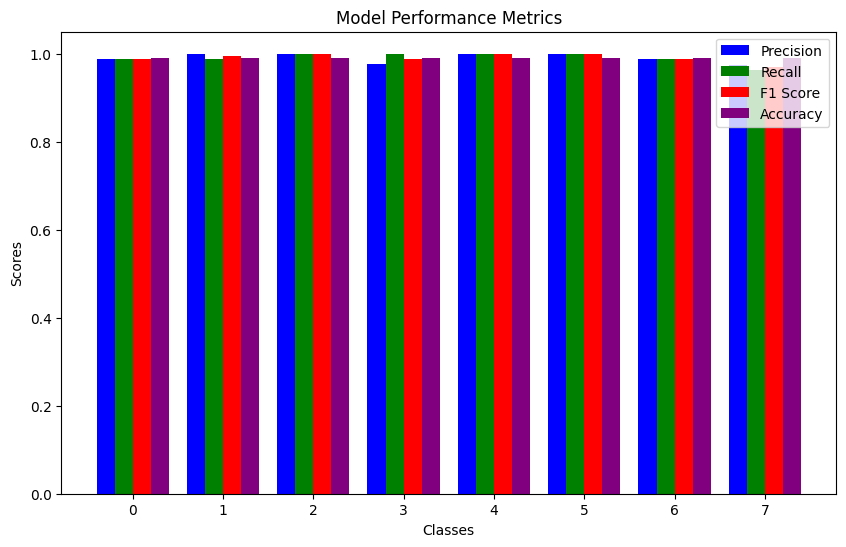

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Compute classification report
report = classification_report(ytrue, yhat, output_dict=True)

# Extract metrics for each class
labels = list(report.keys())[:-3]  # Ignore avg/total
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]
accuracy = [report['accuracy']] * len(labels)  # Accuracy is global

# Plot metrics
x = np.arange(len(labels))
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width*1.5, precision, width, label='Precision', color='blue')
ax.bar(x - width/2, recall, width, label='Recall', color='green')
ax.bar(x + width/2, f1_score, width, label='F1 Score', color='red')
ax.bar(x + width*1.5, accuracy, width, label='Accuracy', color='purple')

# Labels and Title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.show()


In [242]:
print(history.history.keys())


dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


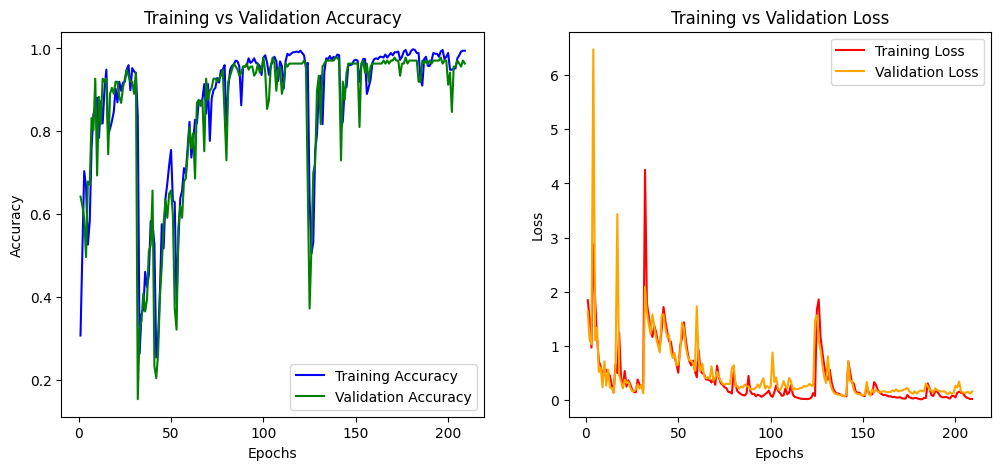

In [243]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    epochs = range(1, len(history.history['categorical_accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['categorical_accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_categorical_accuracy'], label='Validation Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='red')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

# Call the function to visualize training progress
plot_training_history(history)


In [ ]:
import pickle
with open('./model.pkl','wb') as file:
    pickle.dump(model,file)